# Commented script to get stocks data

In [1]:
import pandas as pd
import quandl #quandl is not installed by default. You'll need to install it and get an account.
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
%pylab inline
quandl.ApiConfig.api_key = "cHs3hSC-ys83Msb8qXyh"#This is Jorge's key, get yourself a new one.

Populating the interactive namespace from numpy and matplotlib


<font color='blue'> It seems that the free data is only supported until 2018, so we need to check that</font>


Commented the below and saved the data to a csv to avoid making too many calls

In [10]:
stock = "TSLA" # some stock label we are interested in
# #You'll need to register on quandl.com to get a free account, otherwise you can only make up to 50 calls per day
## get the stock data with quandl
# start = datetime.datetime(2015,1,1) # Beginning of period 
# end = datetime.datetime(2019,1,1) # End of period 
# data = quandl.get("WIKI/" + stock, start_date=start, end_date=end) #download data with quandl
# data.to_csv('TSLA.csv')

Read the data TSLA.csv

In [3]:
data = pd.read_csv('TSLA.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2015-01-02,222.87,223.2500,213.2600,219.310,4764443.0,0.0,1.0,222.87,223.2500,213.2600,219.310,4764443.0
1,2015-01-05,214.55,216.5000,207.1626,210.090,5368477.0,0.0,1.0,214.55,216.5000,207.1626,210.090,5368477.0
2,2015-01-06,210.06,214.2000,204.2100,211.280,6261936.0,0.0,1.0,210.06,214.2000,204.2100,211.280,6261936.0
3,2015-01-07,213.35,214.7800,209.7800,210.950,2968390.0,0.0,1.0,213.35,214.7800,209.7800,210.950,2968390.0
4,2015-01-08,212.81,213.7999,210.0100,210.615,3442509.0,0.0,1.0,212.81,213.7999,210.0100,210.615,3442509.0


In [4]:
data.tail()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
808,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0
809,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0
810,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0
811,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0
812,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0


convert 'Date' to datetime for the ease of manipulation

In [5]:
print(type(data['Date'][0]))
data['Date'] = pd.to_datetime(data['Date'])
print(type(data['Date'][0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Plot the 20-day moving average of TSLA

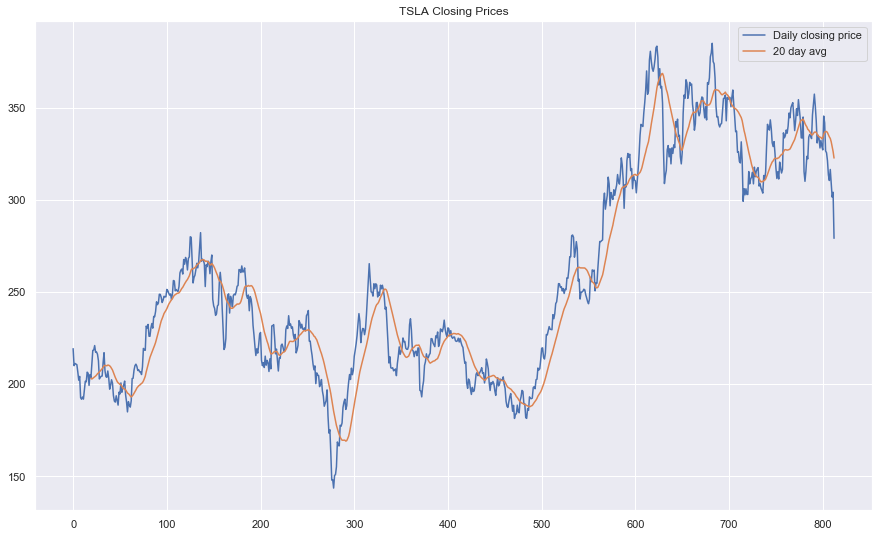

In [12]:
from pylab import *

pylab.rcParams['figure.figsize'] = (15, 9)
plt.title(stock + " Closing Prices")
plt.plot(data["Close"],label="Daily closing price") # plot daily closing prices 
plt.plot(data["20d"], label="20 day avg") # plot 20 day rolling average 
plt.legend()
plt.show()

In [17]:
print(data.Date.min(), '\n',data.Date.max())

2015-01-02 00:00:00 
 2018-03-27 00:00:00


In [50]:
#few-day relative changes in a week
#append weekofyear, weekday, year based on date, 0=Mon, 6=Sun
data['weekofyear'] = data['Date'].dt.weekofyear
data['weekday'] = data['Date'].dt.weekday
data['year'] = data['Date'].dt.year


"""parameters start"""
year_indx = 2017; #what year
weekofyear_indx = 2; #what week of the year
weekday_diff = 4; #how many days of changes we are interested in, 1<=day_diff<= 4
"""parameters end"""

data_weekly = data.loc[(data.year ==year_indx) & (data.weekofyear == weekofyear_indx)] #the 

week_start = data_weekly['weekday'] == data_weekly['weekday'].min()
week_end = data_weekly['weekday'] == data_weekly['weekday'].max()

#handle the errors when there are holidays in a week. 
#In that case we take the maximum possible value for weekday_diff of taht week.
num_of_days_in_this_week  = data_weekly['weekday'].max() - data_weekly['weekday'].min()+1
if  num_of_days_in_this_week-1 >= day_diff:
    week_projected = data_weekly['weekday'] == (data_weekly['weekday'].min() + day_diff) 
else:
    print('There are only {} days in this week. We return the {} day diff instead'.format(
    num_of_days_in_this_week, weekday_diff))
    week_projected = data_weekly['weekday'] == data_weekly['weekday'].max() 


week_difference =  data_weekly[week_projected].Close.values - data_weekly[week_start].Open.values
week_rel_difference = week_difference / data_weekly[week_start].Open.values
print('year={}, week of year = {}, the {}-day relarive difference of stock {} is {} '.format(
    year_indx,weekofyear_indx, weekday_diff, stock, week_rel_difference)  )

# columns = ['polarity', 'weekofyear']
# tweets.loc[tweets['year'] == 2017, columns].groupby('weekofyear').mean()

year=2017, week of year = 2, the 4-day relarive difference of stock TSLA is [0.00270778] 


In [43]:
week_difference
week_rel_difference

array([0.06585684])